C:\Users\zabun\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [16:59:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\zabun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\zabun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 460, number of negative: 356
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2914
[LightGBM] [Info] Number of data points in the train set: 816, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.563725 -> initscore=0.256296
[LightGBM] [Info] Start training from score 0.256296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

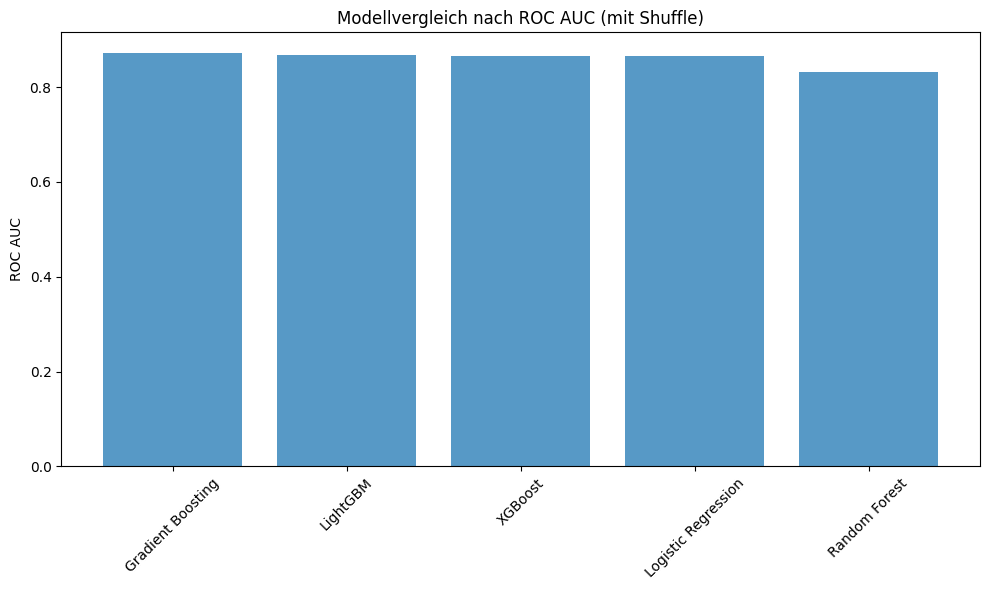

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

# CSV laden
df = pd.read_csv(r"C:\Users\zabun\Desktop\moneyline9x\training_table_no_ids1.csv")

# NaNs droppen
df_clean = df.dropna()

# Features & Target definieren
X = df_clean.drop("HOME_WIN", axis=1)
y = df_clean["HOME_WIN"]

# Shuffle-Split (also REIHEN MISCHEEEN 💥)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Skalierung
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelle
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier()
}

# Training & Auswertung
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    probs = model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, preds)
    roc = roc_auc_score(y_test, probs)

    results.append((name, acc, roc))

# Ergebnisse
results_df = pd.DataFrame(results, columns=["Modell", "Accuracy", "ROC AUC"])
results_df.sort_values(by="ROC AUC", ascending=False, inplace=True)
print(results_df)

# Plot
plt.figure(figsize=(10,6))
plt.bar(results_df["Modell"], results_df["ROC AUC"], alpha=0.75)
plt.title("Modellvergleich nach ROC AUC (mit Shuffle)")
plt.ylabel("ROC AUC")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, make_scorer

# Daten laden
df = pd.read_csv(r"C:\Users\zabun\Desktop\moneyline9x\training_table_no_ids1.csv")
df_clean = df.dropna()

# Features & Ziel
X = df_clean.drop("HOME_WIN", axis=1)
y = df_clean["HOME_WIN"]

# Shuffle-Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Skalierung
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Grid definieren (gründlich & genau)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

# Modell & Scoring
gb = GradientBoostingClassifier()
scorer = make_scorer(roc_auc_score, needs_proba=True)

# Grid Search mit 5-fach Cross-Validation
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Training starten
grid_search.fit(X_train_scaled, y_train)

# Bestes Modell & Score
print("Beste Parameter:")
print(grid_search.best_params_)
print(f"Bestes ROC AUC (CV): {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 162 candidates, totalling 810 fits


C:\Users\zabun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Beste Parameter:
{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Bestes ROC AUC (CV): nan


In [5]:
from sklearn.model_selection import StratifiedKFold

# 5-fach Stratified Cross-Validation (stellt sicher: beide Klassen pro Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearch mit robusterem Setup
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# Nochmal Training starten
grid_search.fit(X_train_scaled, y_train)

# Ergebnisse
print("Beste Parameter:")
print(grid_search.best_params_)
print(f"Bestes ROC AUC (CV): {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 162 candidates, totalling 810 fits


C:\Users\zabun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Beste Parameter:
{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Bestes ROC AUC (CV): nan


In [6]:
print(y_train.value_counts())


HOME_WIN
1    460
0    356
Name: count, dtype: int64


In [7]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train_scaled, y_train)
probs = model.predict_proba(X_test_scaled)[:, 1]
print("Test ROC AUC:", roc_auc_score(y_test, probs))


Test ROC AUC: 0.8773448773448774


In [8]:
small_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1],
    'max_depth': [3]
}

grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=small_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)
print("MiniGrid - Beste Parameter:", grid_search.best_params_)
print("MiniGrid - ROC AUC:", grid_search.best_score_)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
MiniGrid - Beste Parameter: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
MiniGrid - ROC AUC: 0.8907102639994557


In [9]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

# Parameterverteilung
param_dist = {
    'n_estimators': randint(100, 400),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(2, 6),
    'subsample': uniform(0.7, 0.3),
    'min_samples_split': randint(2, 15)
}

# Modell
gb = GradientBoostingClassifier()

# Random Search
random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=50,  # 50 Zufallskombis
    scoring='roc_auc',
    cv=5,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# Start!
random_search.fit(X_train_scaled, y_train)

# Beste Ergebnisse
print("Beste Parameter (RandomSearch):")
print(random_search.best_params_)
print(f"ROC AUC (CV): {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Beste Parameter (RandomSearch):
{'learning_rate': 0.0430533878126005, 'max_depth': 2, 'min_samples_split': 8, 'n_estimators': 108, 'subsample': 0.9316734307889971}
ROC AUC (CV): 0.9010


ROC AUC (kalibriert): 0.8583934583934583
Log Loss: 0.4722032824852322


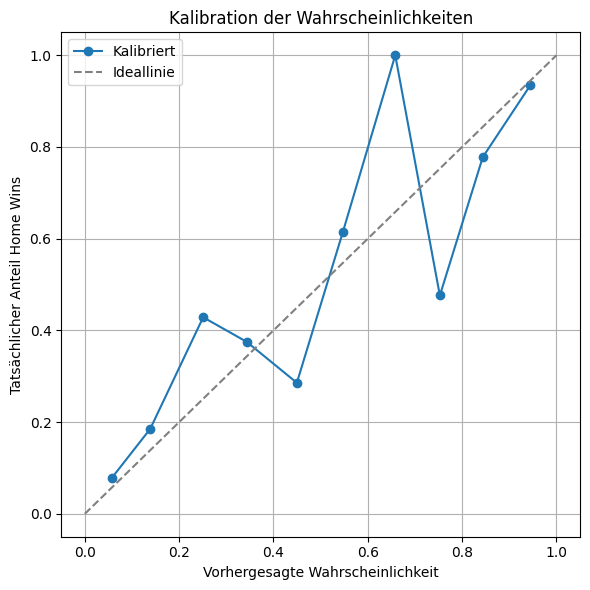

In [10]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt
import numpy as np

# Nimm das trainierte Modell aus RandomizedSearch
best_model = random_search.best_estimator_

# Kalibrierung (Platt Scaling als Beispiel)
calibrated = CalibratedClassifierCV(best_model, cv=5, method='sigmoid')
calibrated.fit(X_train_scaled, y_train)

# Vorhersagewahrscheinlichkeiten
y_probs = calibrated.predict_proba(X_test_scaled)[:, 1]
y_preds = calibrated.predict(X_test_scaled)

# ROC AUC & Log Loss
from sklearn.metrics import roc_auc_score, log_loss
print("ROC AUC (kalibriert):", roc_auc_score(y_test, y_probs))
print("Log Loss:", log_loss(y_test, y_probs))

# Calibration Curve Plot
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Kalibriert')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Ideallinie')
plt.xlabel("Vorhergesagte Wahrscheinlichkeit")
plt.ylabel("Tatsächlicher Anteil Home Wins")
plt.title("Kalibration der Wahrscheinlichkeiten")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ROC AUC (isotonic): 0.86002886002886
Log Loss (isotonic): 0.7902432788502064


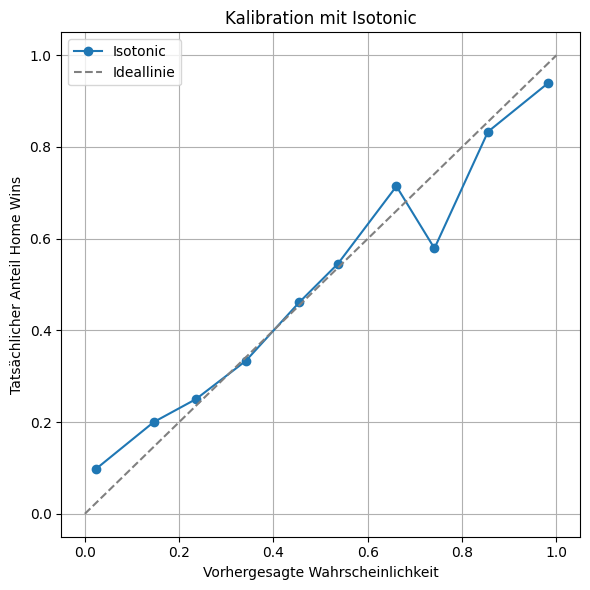

In [11]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, log_loss

# Kalibrierung mit Isotonic
calibrated_iso = CalibratedClassifierCV(best_model, cv=5, method='isotonic')
calibrated_iso.fit(X_train_scaled, y_train)

# Wahrscheinlichkeiten
y_probs_iso = calibrated_iso.predict_proba(X_test_scaled)[:, 1]
y_preds_iso = calibrated_iso.predict(X_test_scaled)

# Metriken
print("ROC AUC (isotonic):", roc_auc_score(y_test, y_probs_iso))
print("Log Loss (isotonic):", log_loss(y_test, y_probs_iso))

# Calibration Curve Plot
prob_true, prob_pred = calibration_curve(y_test, y_probs_iso, n_bins=10)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Isotonic')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Ideallinie')
plt.xlabel("Vorhergesagte Wahrscheinlichkeit")
plt.ylabel("Tatsächlicher Anteil Home Wins")
plt.title("Kalibration mit Isotonic")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
import joblib

# Featureliste speichern
feature_list = list(X.columns)

# Dictionary mit allem was wichtig ist
model_bundle = {
    'model': calibrated_iso,
    'scaler': scaler,
    'features': feature_list
}

# Speichern
joblib.dump(model_bundle, 'master_nba_model.pkl')

print("✅ Modell, Scaler & Features gespeichert als 'master_nba_model.pkl'")


✅ Modell, Scaler & Features gespeichert als 'master_nba_model.pkl'


In [13]:
import joblib
import pandas as pd

def predict_home_win_probability_from_bundle(model_bundle, df_team_values, home_team_id, away_team_id):
    """
    model_bundle: dict mit keys 'model', 'scaler', 'features'
    df_team_values: aktueller Team-Status (z. B. TEAM_LATEST_VALUES1.csv)
    home_team_id: TEAM_ID des Heimteams
    away_team_id: TEAM_ID des Auswärtsteams
    """

    row_home = df_team_values[df_team_values["TEAM_ID"] == home_team_id].iloc[0]
    row_away = df_team_values[df_team_values["TEAM_ID"] == away_team_id].iloc[0]

    # Input-Vektor im Trainings-Format
    X_input = pd.DataFrame([{
        "ELO_HOME": row_home["ELO"],
        "ELO_AWAY": row_away["ELO"],
        "MOMENTUM_HOME_CLEAN": row_home["MOMENTUM"],
        "MOMENTUM_AWAY_CLEAN": row_away["MOMENTUM"],
        "AVG_HOME_PTS_3": row_home["AVG_PTS_3"],
        "AVG_AWAY_PTS_3": row_away["AVG_PTS_3"],
        "AVG_HOME_PTS_7": row_home["AVG_PTS_7"],
        "AVG_AWAY_PTS_7": row_away["AVG_PTS_7"],
        "AVG_HOME_FG_PCT_3": row_home["AVG_FG_PCT_3"],
        "AVG_AWAY_FG_PCT_3": row_away["AVG_FG_PCT_3"],
        "AVG_HOME_FG_PCT_7": row_home["AVG_FG_PCT_7"],
        "AVG_AWAY_FG_PCT_7": row_away["AVG_FG_PCT_7"],
        "AVG_HOME_REB_3": row_home["AVG_REB_3"],
        "AVG_AWAY_REB_3": row_away["AVG_REB_3"],
        "AVG_HOME_REB_7": row_home["AVG_REB_7"],
        "AVG_AWAY_REB_7": row_away["AVG_REB_7"],
        "AVG_HOME_AST_3": row_home["AVG_AST_3"],
        "AVG_AWAY_AST_3": row_away["AVG_AST_3"],
        "AVG_HOME_AST_7": row_home["AVG_AST_7"],
        "AVG_AWAY_AST_7": row_away["AVG_AST_7"],
        "AVG_HOME_STL_3": row_home["AVG_STL_3"],
        "AVG_AWAY_STL_3": row_away["AVG_STL_3"],
        "AVG_HOME_STL_7": row_home["AVG_STL_7"],
        "AVG_AWAY_STL_7": row_away["AVG_STL_7"],
        "AVG_HOME_BLK_3": row_home["AVG_BLK_3"],
        "AVG_AWAY_BLK_3": row_away["AVG_BLK_3"],
        "AVG_HOME_BLK_7": row_home["AVG_BLK_7"],
        "AVG_AWAY_BLK_7": row_away["AVG_BLK_7"]
    }])

    # Skalierung + Vorhersage
    X_scaled = model_bundle["scaler"].transform(X_input)
    prob = model_bundle["model"].predict_proba(X_scaled)[0][1]

    return prob


In [24]:
# Modell laden
model_bundle = joblib.load("master_nba_model.pkl")

# CSV mit aktuellen Teamwerten
df_team_values = pd.read_csv(r"C:\Users\zabun\Desktop\moneyline9x\TEAM_LATEST_VALUES1.csv")

# Beispiel: ATL vs LAL
home_id = 1610612755  # Atlanta Hawks
away_id = 1610612749  # LA Lakers

# Vorhersage
prob = predict_home_win_probability_from_bundle(model_bundle, df_team_values, home_id, away_id)
print(f"🏀 Gewinnwahrscheinlichkeit für das Heimteam: {prob:.2%}")


🏀 Gewinnwahrscheinlichkeit für das Heimteam: 63.71%


In [53]:
import pandas as pd
import joblib

# 1) Modell-Bundle laden
model_bundle = joblib.load("master_nba_model.pkl")

# 2) Trainingsdaten mit aktuellen Team-Stats
df_training3 = pd.read_csv(r"C:\Users\zabun\Desktop\moneyline9x\tRaining 3.csv")

# 3) Funktion, um Input aus den aktuellsten Stats eines Teams zu generieren
def build_input_from_latest_stats(df, home_team_id, away_team_id):
    home_rows = df[df["HOME_TEAM_ID"] == home_team_id]
    latest_home = home_rows.sort_values(by="HOME_GAME_ID", ascending=False).iloc[0]

    away_rows = df[df["AWAY_TEAM_ID"] == away_team_id]
    latest_away = away_rows.sort_values(by="AWAY_GAME_ID", ascending=False).iloc[0]

    return pd.DataFrame([{
        "ELO_HOME": latest_home["ELO_HOME"],
        "ELO_AWAY": latest_away["ELO_AWAY"],
        "MOMENTUM_HOME_CLEAN": latest_home["MOMENTUM_HOME_CLEAN"],
        "MOMENTUM_AWAY_CLEAN": latest_away["MOMENTUM_AWAY_CLEAN"],
        "AVG_HOME_PTS_3": latest_home["AVG_HOME_PTS_3"],
        "AVG_AWAY_PTS_3": latest_away["AVG_AWAY_PTS_3"],
        "AVG_HOME_PTS_7": latest_home["AVG_HOME_PTS_7"],
        "AVG_AWAY_PTS_7": latest_away["AVG_AWAY_PTS_7"],
        "AVG_HOME_FG_PCT_3": latest_home["AVG_HOME_FG_PCT_3"],
        "AVG_AWAY_FG_PCT_3": latest_away["AVG_AWAY_FG_PCT_3"],
        "AVG_HOME_FG_PCT_7": latest_home["AVG_HOME_FG_PCT_7"],
        "AVG_AWAY_FG_PCT_7": latest_away["AVG_AWAY_FG_PCT_7"],
        "AVG_HOME_REB_3": latest_home["AVG_HOME_REB_3"],
        "AVG_AWAY_REB_3": latest_away["AVG_AWAY_REB_3"],
        "AVG_HOME_REB_7": latest_home["AVG_HOME_REB_7"],
        "AVG_AWAY_REB_7": latest_away["AVG_AWAY_REB_7"],
        "AVG_HOME_AST_3": latest_home["AVG_HOME_AST_3"],
        "AVG_AWAY_AST_3": latest_away["AVG_AWAY_AST_3"],
        "AVG_HOME_AST_7": latest_home["AVG_HOME_AST_7"],
        "AVG_AWAY_AST_7": latest_away["AVG_AWAY_AST_7"],
        "AVG_HOME_STL_3": latest_home["AVG_HOME_STL_3"],
        "AVG_AWAY_STL_3": latest_away["AVG_AWAY_STL_3"],
        "AVG_HOME_STL_7": latest_home["AVG_HOME_STL_7"],
        "AVG_AWAY_STL_7": latest_away["AVG_AWAY_STL_7"],
        "AVG_HOME_BLK_3": latest_home["AVG_HOME_BLK_3"],
        "AVG_AWAY_BLK_3": latest_away["AVG_AWAY_BLK_3"],
        "AVG_HOME_BLK_7": latest_home["AVG_HOME_BLK_7"],
        "AVG_AWAY_BLK_7": latest_away["AVG_AWAY_BLK_7"]
    }])

# 4) Vorhersagefunktion
def predict_game_by_team_ids(home_team_id, away_team_id):
    X_input = build_input_from_latest_stats(df_training3, home_team_id, away_team_id)
    X_scaled = model_bundle["scaler"].transform(X_input)
    prob = model_bundle["model"].predict_proba(X_scaled)[0][1]
    return prob

# 5) TEST – Beispiel: Chicago Bulls vs. Orlando Magic
home_id = 1610612747  # Chicago
away_id = 1610612744  # Orlando
result = predict_game_by_team_ids(home_id, away_id)

print(f"🏀 Wahrscheinlichkeit, dass {home_id} (Heimteam) gewinnt: {result:.2%}")


🏀 Wahrscheinlichkeit, dass 1610612747 (Heimteam) gewinnt: 62.31%


In [70]:
import pandas as pd
import joblib

# Modell laden
model_bundle = joblib.load("master_nba_model.pkl")

# Die Input-Datei mit einer Zeile
df_ready = pd.read_csv(r"C:\Users\zabun\Desktop\moneyline9x\nba_model_input_ready.csv")

# Die erwartete Spaltenreihenfolge direkt aus dem Modell ziehen
expected_columns = model_bundle["scaler"].feature_names_in_

# Input entsprechend sortieren
df_ready = df_ready[expected_columns]

# Skalieren und vorhersagen
X_scaled = model_bundle["scaler"].transform(df_ready)
prob = model_bundle["model"].predict_proba(X_scaled)[0][1]

print(f"🏀 Siegwahrscheinlichkeit des Heimteams: {prob:.2%}")


🏀 Siegwahrscheinlichkeit des Heimteams: 98.38%
